<a href="https://colab.research.google.com/github/finnecoiitg/Derivative-Modelling---JPMC-Quant-Challenge-2022/blob/main/Question4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing Libraries**

In [ ]:
import numpy as np
from numpy.random import normal
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
NUM_SIMULATIONS = 10000
N = 1200

### **Simulating stock price movement using CIR Model**

In [ ]:
def generate_stock_prices(a = 1, b = 70, sigma = 0.5, S0 = 30, T = 2):
	stock_prices = [S0]

	dt = T / N

	for _ in range(N):
		ds = a * (b - stock_prices[-1]) * dt + sigma * np.sqrt(abs(stock_prices[-1])) * np.sqrt(dt) * normal(0, 1)      # Stochastic process for CIR Model
		stock_prices.append(stock_prices[-1] + ds)

	return stock_prices

### **Plotting stock prices (Monte Carlo Simulation)**

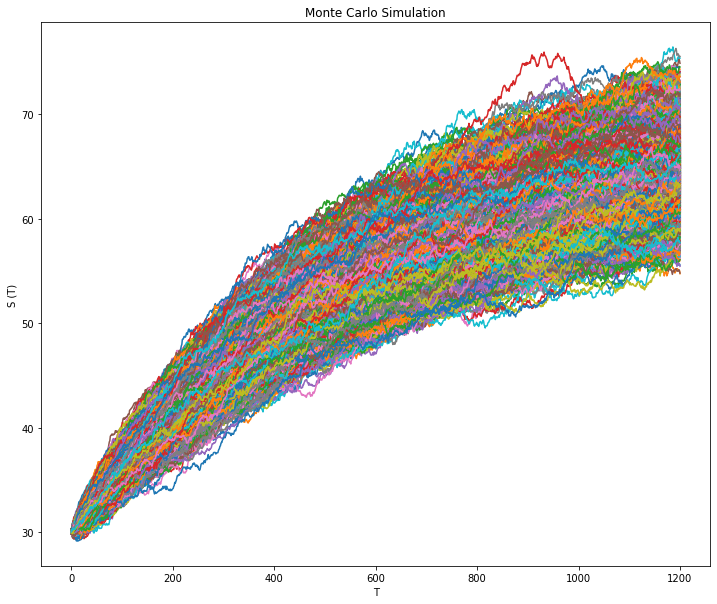

In [ ]:
price_data = []

for _ in range(NUM_SIMULATIONS):
	price_data.append(generate_stock_prices())						# Generating a time series of stock price for each simulation

price_data = pd.DataFrame(price_data)
price_data = price_data.T

plt.figure(figsize = (12, 10))
plt.plot(price_data)
plt.xlabel('T')
plt.ylabel('S (T)')
plt.title("Monte Carlo Simulation")
plt.show()

### **Generating payoffs for each simulation**

In [ ]:
Sb = int(input("input1: "))                               # Barrier level of the option
K = int(input("input2: "))                                # Strike price of the option

input1: 80
input2: 70


In [ ]:
payoffs = []

for i in price_data:
  knocked_out = False
  for t in range(int(N/24), N+1, int(N/24)):
    if price_data[i][t] > Sb:                             # Monitoring the option at regular intervals
      payoffs.append(0)                                   # Option gets knocked out when stock price goes above the barrier level
      knocked_out = True
      break

  if not knocked_out:
    payoffs.append(max(0, K - price_data[i][N]))       # For put option: Payoff = Max(0, K - S[T])

### **Generating option value**

In [ ]:
option_value = np.average(payoffs)      # We will average out payoffs of all the simulations to get the expected value
                                        # of the option. This value obtained is the future value and must be discounted
                                        # to get the present value

r = 0.1     # Discount rate
T = 2

option_value_curr = option_value * np.exp(-r*T)         # Present value of the option

print(option_value_curr)

4.427267555335756
